In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from itertools import combinations

In [2]:
data_path = Path('./data/transform/')
driver_df = pd.read_csv(data_path / 'driver.csv', sep='|')
car_df = pd.read_csv(data_path / 'car.csv', sep='|')

## Driver and Car Combos

Pick 5 + 1

If the purpose of the game was to pick a lineup and keep it, this analysis would show the optimal lineups so far, maximizing average points within a budget constraint.

In [3]:
driver_df['Current Price'].sum()

278.9

In [4]:
min_car_price = car_df['Current Price'].min()
max_car_price = car_df['Current Price'].max()

### All driver combos within budget range

In [5]:
combos = []
total_budget = 105.1


for i, index in enumerate(list(combinations(driver_df.index, 5))):
    cost = driver_df.loc[index, ['Current Price']].sum()[0]
    if cost < total_budget - min_car_price and cost > total_budget - max_car_price:
        combos.append(pd.DataFrame(driver_df.loc[index, ['last_name', 'diff_price', 'Current Price', 'avg']].sum()).T)
        
        

In [6]:
combo_df = pd.concat(combos).sort_values(by='avg', ascending=False)
combo_df[:200]

,last_name,diff_price,Current Price,avg
0,VerstappenPerezLeclercSainzBottas,36.314153,94.4,144.285714
0,VerstappenRussellPerezLeclercMagnussen,31.143434,97.5,142.0
0,VerstappenRussellPerezLeclercLatifi,30.255174,98.0,141.571429
0,VerstappenPerezLeclercBottasNorris,34.996334,93.0,141.285714
0,VerstappenPerezLeclercSainzOcon,30.566914,97.3,141.142857
...,...,...,...,...
0,RussellLeclercOconBottasNorris,29.477541,80.4,121.285714
0,VerstappenRussellLeclercStrollAlbon,19.877541,90.0,121.285714
0,VerstappenRussellOconBottasNorris,17.848121,91.9,121.142857
0,VerstappenRussellLeclercGaslyStroll,14.748121,95.0,121.142857


## Driver Combos + Car

In [7]:
all_combo = combo_df.merge(car_df, how='cross', suffixes=['', '_car'])

In [8]:
all_combo

,last_name,diff_price,Current Price,avg,Unnamed: 0_x,Team,BAH,SAU,AUS,ITA,...,avg_car,max,median,pts_price,pts_price_med,Unnamed: 0_y,Current Price_car,Season Start PriceSeason Price,Points/Million,diff_price_car
0,VerstappenPerezLeclercSainzBottas,36.314153,94.4,144.285714,0,Mercedes,57,34,64,31,...,45.285714,64,42.0,29.614004,27.465354,0,33.7,34.5,1.34,-4.085996
1,VerstappenPerezLeclercSainzBottas,36.314153,94.4,144.285714,1,Red Bull,4,62,39,99,...,62.285714,99,69.0,40.730934,45.121654,1,32.6,32.5,1.91,8.130934
2,VerstappenPerezLeclercSainzBottas,36.314153,94.4,144.285714,2,Alpine,24,13,10,8,...,17.428571,33,15.0,11.397188,9.809055,4,13.9,14.0,1.25,-2.502812
3,VerstappenPerezLeclercSainzBottas,36.314153,94.4,144.285714,3,Ferrari,76,63,44,30,...,50.000000,76,51.0,32.696850,33.350787,2,25.7,25.0,1.95,6.996850
4,VerstappenPerezLeclercSainzBottas,36.314153,94.4,144.285714,4,AlphaTauri,10,3,8,36,...,10.571429,36,8.0,6.913048,5.231496,6,10.0,10.5,1.06,-3.086952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63835,HamiltonAlonsoVettelSchumacherRicciardo,-37.650673,73.5,39.571429,5,Aston Martin,14,19,3,32,...,14.857143,32,15.0,9.715636,9.809055,5,10.9,11.5,1.36,-1.184364
63836,HamiltonAlonsoVettelSchumacherRicciardo,-37.650673,73.5,39.571429,6,Alfa Romeo,31,3,24,35,...,18.142857,35,21.0,11.864286,13.732677,7,8.8,8.0,2.06,3.064286
63837,HamiltonAlonsoVettelSchumacherRicciardo,-37.650673,73.5,39.571429,7,Williams,15,-1,8,17,...,11.428571,26,14.0,7.473566,9.155118,8,6.5,7.0,1.76,0.973566
63838,HamiltonAlonsoVettelSchumacherRicciardo,-37.650673,73.5,39.571429,8,Haas,27,1,13,8,...,4.571429,27,5.0,2.989426,3.269685,9,6.4,6.0,0.71,-3.410574


In [9]:
all_combo['total_diff_price'] = all_combo['diff_price'] + all_combo['diff_price_car']
all_combo['total_price'] = all_combo['Current Price'] + all_combo['Current Price_car']
all_combo['total_avg'] = all_combo['avg'] + all_combo['avg_car']

## Combos Filtered for Budget

In [10]:
all_combo_b = all_combo[all_combo['total_price'] < total_budget].sort_values(by='total_avg', ascending=False).reset_index()

In [11]:
all_combo_b.head(50)[['last_name', 'Team', 'total_avg', 'total_diff_price', 'total_price']]

,last_name,Team,total_avg,total_diff_price,total_price
0,PerezLeclercBottasStrollNorris,Red Bull,180.428571,43.761235,104.0
1,RussellPerezLeclercBottasStroll,Ferrari,180.285714,45.727848,105.0
2,PerezLeclercSainzBottasAlbon,Red Bull,180.142857,43.102395,104.4
3,PerezLeclercSainzTsunodaBottas,Red Bull,179.0,41.667036,104.8
4,RussellPerezLeclercBottasAlbon,Ferrari,177.0,43.751189,104.0
5,RussellPerezLeclercBottasMagnussen,Ferrari,177.0,45.551189,102.2
6,RussellPerezLeclercBottasLatifi,Ferrari,176.571429,44.662929,102.7
7,PerezLeclercSainzBottasZhou,Red Bull,176.428571,39.237477,104.9
8,PerezLeclercSainzOconBottas,Ferrari,176.142857,44.974669,102.0
9,RussellPerezLeclercTsunodaBottas,Ferrari,175.857143,42.31583,104.4


## 5 Driver Combos

<AxesSubplot:>

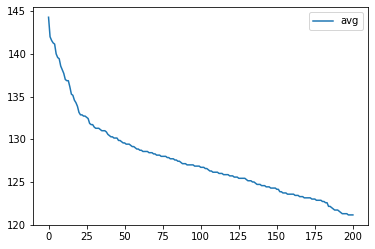

In [12]:
combo_df.sort_values(by='avg', ascending=False).reset_index().loc[0:200, ['avg']].plot()

## Five Driver + Car Combos

<AxesSubplot:>

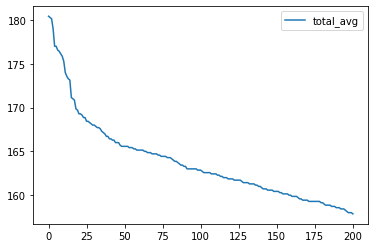

In [13]:
all_combo_b.sort_values(by='total_avg', ascending=False).reset_index().loc[0:200, ['total_avg']].plot()

In [14]:
all_combo_b.sort_values(by='total_avg', ascending=False).head(50)

,index,last_name,diff_price,Current Price,avg,Unnamed: 0_x,Team,BAH,SAU,AUS,...,pts_price,pts_price_med,Unnamed: 0_y,Current Price_car,Season Start PriceSeason Price,Points/Million,diff_price_car,total_diff_price,total_price,total_avg
0,2701,PerezLeclercBottasStrollNorris,35.630302,71.4,118.142857,1,Red Bull,4,62,39,...,40.730934,45.121654,1,32.6,32.5,1.91,8.130934,43.761235,104.0,180.428571
1,413,RussellPerezLeclercBottasStroll,38.730998,79.3,130.285714,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,45.727848,105.0,180.285714
2,2771,PerezLeclercSainzBottasAlbon,34.971462,71.8,117.857143,1,Red Bull,4,62,39,...,40.730934,45.121654,1,32.6,32.5,1.91,8.130934,43.102395,104.4,180.142857
3,3281,PerezLeclercSainzTsunodaBottas,33.536102,72.2,116.714286,1,Red Bull,4,62,39,...,40.730934,45.121654,1,32.6,32.5,1.91,8.130934,41.667036,104.8,179.0
4,953,RussellPerezLeclercBottasAlbon,36.754339,78.3,127.0,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,43.751189,104.0,177.0
5,933,RussellPerezLeclercBottasMagnussen,38.554339,76.5,127.0,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,45.551189,102.2,177.0
6,1043,RussellPerezLeclercBottasLatifi,37.666079,77.0,126.571429,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,44.662929,102.7,176.571429
7,4941,PerezLeclercSainzBottasZhou,31.106543,72.3,114.142857,1,Red Bull,4,62,39,...,40.730934,45.121654,1,32.6,32.5,1.91,8.130934,39.237477,104.9,176.428571
8,1103,PerezLeclercSainzOconBottas,37.977819,76.3,126.142857,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,44.974669,102.0,176.142857
9,1173,RussellPerezLeclercTsunodaBottas,35.318979,78.7,125.857143,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,42.31583,104.4,175.857143


In [15]:
all_combo_b[all_combo_b['last_name'].str.contains('Verstappen')].head(50)

,index,last_name,diff_price,Current Price,avg,Unnamed: 0_x,Team,BAH,SAU,AUS,...,pts_price,pts_price_med,Unnamed: 0_y,Current Price_car,Season Start PriceSeason Price,Points/Million,diff_price_car,total_diff_price,total_price,total_avg
22,9711,VerstappenLeclercBottasLatifiMagnussen,25.106125,71.7,106.857143,1,Red Bull,4,62,39,...,40.730934,45.121654,1,32.6,32.5,1.91,8.130934,33.237059,104.3,169.142857
37,11321,VerstappenPerezBottasAlbonMagnussen,22.664826,72.2,104.714286,1,Red Bull,4,62,39,...,40.730934,45.121654,1,32.6,32.5,1.91,8.130934,30.79576,104.8,167.0
51,3883,VerstappenLeclercOconBottasAlbon,25.400742,79.3,115.571429,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,32.397593,105.0,165.571429
52,3893,VerstappenLeclercOconBottasMagnussen,27.200742,77.5,115.571429,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,34.197593,103.2,165.571429
62,4183,VerstappenLeclercOconBottasLatifi,26.312483,78.0,115.142857,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,33.309333,103.7,165.142857
91,5603,VerstappenPerezOconBottasMagnussen,25.671183,76.7,113.0,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,32.668034,102.4,163.0
94,5653,VerstappenPerezOconBottasAlbon,23.871183,78.5,113.0,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,30.868034,104.2,163.0
105,6033,VerstappenPerezOconBottasLatifi,24.782923,77.2,112.571429,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,31.779774,102.9,162.571429
110,6,VerstappenPerezLeclercSainzBottas,36.314153,94.4,144.285714,6,Alfa Romeo,31,3,24,...,11.864286,13.732677,7,8.8,8.0,2.06,3.064286,39.378439,103.2,162.428571
119,6413,VerstappenPerezTsunodaOconBottas,22.435824,78.9,111.857143,3,Ferrari,76,63,44,...,32.696850,33.350787,2,25.7,25.0,1.95,6.996850,29.432674,104.6,161.857143
